In [5]:
#Import libraries

import os
import tensorflow as tf
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit

#Download dataset

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

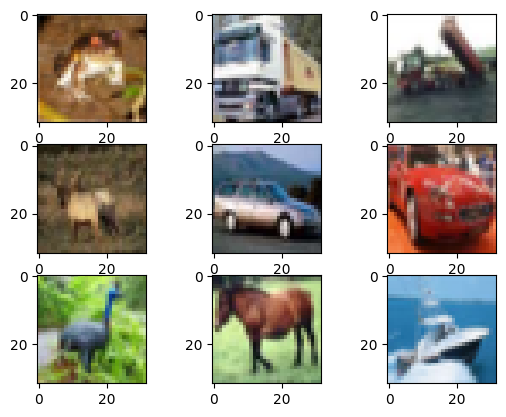

In [6]:
# plot first few images
for i in range(9):
 # define subplot
 plt.subplot(330 + 1 + i)
 # plot raw pixel data
 plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))

# show the figure
plt.show()

In [7]:
# normalize inputs from 0-255 to 0.0-1.0
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255.0
x_test = x_test / 255.0

In [3]:
print(x_train[0])

[[[0.23137255 0.24313726 0.24705882]
  [0.16862746 0.18039216 0.1764706 ]
  [0.19607843 0.1882353  0.16862746]
  ...
  [0.61960787 0.5176471  0.42352942]
  [0.59607846 0.49019608 0.4       ]
  [0.5803922  0.4862745  0.40392157]]

 [[0.0627451  0.07843138 0.07843138]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509805 0.21568628]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117648 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215687 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941177 0.19607843]
  [0.47058824 0.32941177 0.19607843]
  [0.42745098 0.28627452 0.16470589]]

 ...

 [[0.8156863  0.6666667  0.3764706 ]
  [0.7882353  0.6        0.13333334]
  [0.7764706  0.6313726  0.10196079]
  ...
  [0.627451   0.52156866 0.27450982]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333334 0.07843138]]

 [[0.7058824  0.54509807 0.3764706 ]
  [0.6784314  0.48235294 0.16470589]


In [9]:
# summarize loaded dataset
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test:  X=%s, y=%s' % (x_test.shape, y_test.shape))

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test:  X=(10000, 32, 32, 3), y=(10000, 1)


In [10]:
# These lines perform color channel conversion by taking a weighted sum of the RGB channels using the provided coefficients [0.299, 0.587, 0.114].
# This operation effectively converts the color images to grayscale, where each pixel now represents a single grayscale intensity value.
x_train=np.dot(x_train[...,:3], [0.299, 0.587, 0.114])
x_test=np.dot(x_test[...,:3], [0.299, 0.587, 0.114])

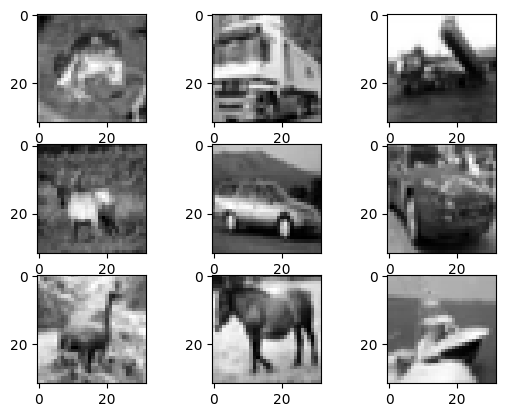

In [11]:
# plot first few images
for i in range(9):
 # define subplot
 plt.subplot(330 + 1 + i)
 # plot raw pixel data
 plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))

# show the figure
plt.show()

In [12]:
print(x_train[0])

[[0.24006667 0.17642746 0.1883451  ... 0.53740395 0.51157256 0.50502746]
 [0.07374118 0.         0.03952157 ... 0.37138432 0.35294903 0.36880393]
 [0.09394902 0.03487451 0.12318432 ... 0.35407844 0.35642354 0.31462746]
 ...
 [0.67814119 0.60308237 0.61440394 ... 0.52506277 0.14015294 0.14935295]
 [0.57394904 0.50476863 0.56298826 ... 0.59846277 0.27165883 0.2345255 ]
 [0.59088237 0.53596473 0.57565885 ... 0.73941962 0.48623923 0.38819216]]


In [13]:
# summarize loaded dataset
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test:  X=%s, y=%s' % (x_test.shape, y_test.shape))

Train: X=(50000, 32, 32), y=(50000, 1)
Test:  X=(10000, 32, 32), y=(10000, 1)


In [14]:
# add empty color dimension
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [15]:
# summarize loaded dataset
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test:  X=%s, y=%s' % (x_test.shape, y_test.shape))

Train: X=(50000, 32, 32, 1), y=(50000, 1)
Test:  X=(10000, 32, 32, 1), y=(10000, 1)


In [16]:
#Split the dataset into train and valid
s = StratifiedShuffleSplit(n_splits=5, random_state=0, test_size=1/6)
train_index, valid_index = next(s.split(x_train, y_train))
x_valid, y_valid = x_train[valid_index], y_train[valid_index]
x_train, y_train = x_train[train_index], y_train[train_index]
print(x_train.shape, x_valid.shape, x_test.shape)

(41666, 32, 32, 1) (8334, 32, 32, 1) (10000, 32, 32, 1)


In [8]:
# TPU
# assert 'COLAB_TPU_ADDR' in os.environ, 'missing TPU'
# if 'COLAB_TPU_ADDR' in os.environ:
#   TF_MASTER = 'grpc://{}'.format(os.environ['COLAB_TPU_ADDR'])
# else:
#   TF_MASTER = ''

# tpu_address = TF_MASTER

In [9]:
# resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu_address)
# tf.config.experimental_connect_to_cluster(resolver)
# tf.tpu.experimental.initialize_tpu_system(resolver)
# strategy = tf.distribute.TPUStrategy(resolver)
# print("all devices: ", tf.config.list_logical_devices('TPU'))
# print("number of devices: ", len(tf.config.list_logical_devices('TPU')))

In [28]:
# with strategy.scope():
# cnn model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.BatchNormalization(input_shape=x_train.shape[1:]))
model.add(tf.keras.layers.Conv2D(64, (5, 5), padding='same', input_shape=x_train.shape[1:], activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.BatchNormalization(input_shape=x_train.shape[1:]))
model.add(tf.keras.layers.Conv2D(128, (5, 5), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.BatchNormalization(input_shape=x_train.shape[1:]))
model.add(tf.keras.layers.Conv2D(256, (5, 5), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(128))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Activation('softmax'))
model.summary()

model.compile(
      optimizer=tf.keras.optimizers.legacy.Adam(learning_rate= 0.001),
      loss=tf.keras.losses.sparse_categorical_crossentropy,
      metrics=['sparse_categorical_accuracy']
)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_3 (Bat  (None, 32, 32, 1)         4         
 chNormalization)                                                
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 64)        1664      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 16, 16, 64)        0         
                                                                 
 batch_normalization_4 (Bat  (None, 16, 16, 64)        256       
 chNormalization)                                                
                                                      

In [29]:
# the transformation of this data on a random basis and gives the output resultant containing only the data that is newly transformed.
# It does not add the data.
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
)
datagen.fit(x_train)

In [19]:
print(model)

In [13]:
# print(strategy)
# strategy

In [30]:
batch_size = 128
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=batch_size),
    epochs = 60,
    steps_per_epoch = int(np.ceil(x_train.shape[0] / batch_size)),
    validation_data = (x_valid, y_valid),
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2, verbose=1)] # helps to stop learning when overfitting occurs
)

Epoch 1/60
326/326 [==============================] - 16s 47ms/step - loss: 2.3057 - sparse_categorical_accuracy: 0.1194 - val_loss: 2.2987 - val_sparse_categorical_accuracy: 0.1075
Epoch 2/60
326/326 [==============================] - 15s 46ms/step - loss: 2.2115 - sparse_categorical_accuracy: 0.1383 - val_loss: 2.0745 - val_sparse_categorical_accuracy: 0.1873
Epoch 3/60
326/326 [==============================] - 15s 44ms/step - loss: 2.1329 - sparse_categorical_accuracy: 0.1619 - val_loss: 1.9722 - val_sparse_categorical_accuracy: 0.2328
Epoch 4/60
326/326 [==============================] - 15s 45ms/step - loss: 2.0220 - sparse_categorical_accuracy: 0.2037 - val_loss: 1.9080 - val_sparse_categorical_accuracy: 0.2281
Epoch 5/60
326/326 [==============================] - 15s 46ms/step - loss: 1.8767 - sparse_categorical_accuracy: 0.2574 - val_loss: 1.7139 - val_sparse_categorical_accuracy: 0.3213
Epoch 6/60
326/326 [==============================] - 15s 46ms/step - loss: 1.7728 - spars

In [31]:
# Print validation accuracy
score = model.evaluate(x_valid, y_valid, verbose=0)
print('\n', 'Valid accuracy:', score[1])

# Print test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Valid accuracy: 0.8086153268814087

 Test accuracy: 0.7986999750137329


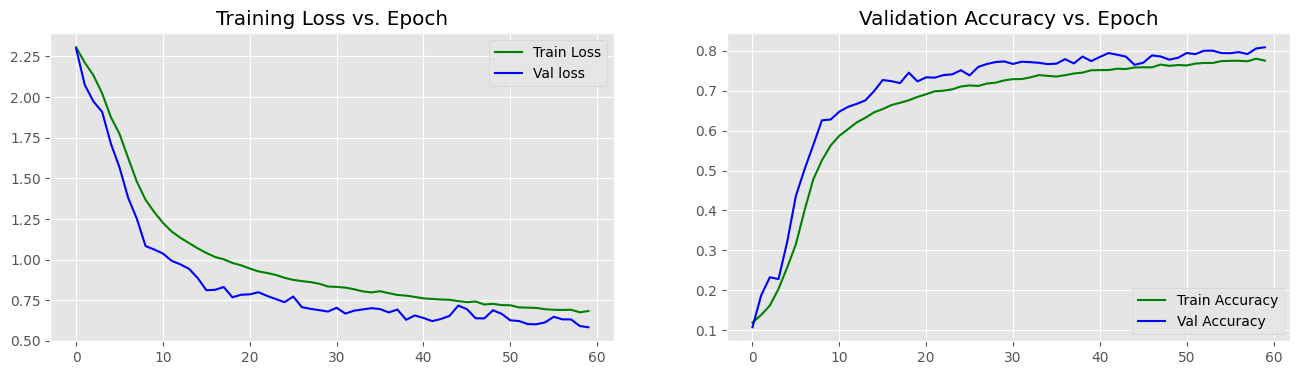

In [32]:
# For visually better looking plots
import matplotlib.pyplot as plt
# Changing default figure size for properly accomodating images
from pylab import rcParams
rcParams['figure.figsize'] = (16, 4)
plt.style.use('ggplot')

f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
ax1.set_title('Training Loss vs. Epoch')
ax2.set_title('Validation Accuracy vs. Epoch')

ax1.plot(history.history['loss'], color='green', label='Train Loss')
ax1.plot(history.history['val_loss'], color='blue', label='Val loss')

ax2.plot(history.history['sparse_categorical_accuracy'], color='green', label='Train Accuracy')
ax2.plot(history.history['val_sparse_categorical_accuracy'], color='blue', label='Val Accuracy')

ax1.legend(loc='upper right')
ax2.legend(loc='lower right')
plt.show()

1/1 [==============================] - 0s 109ms/step


<Figure size 400x300 with 0 Axes>

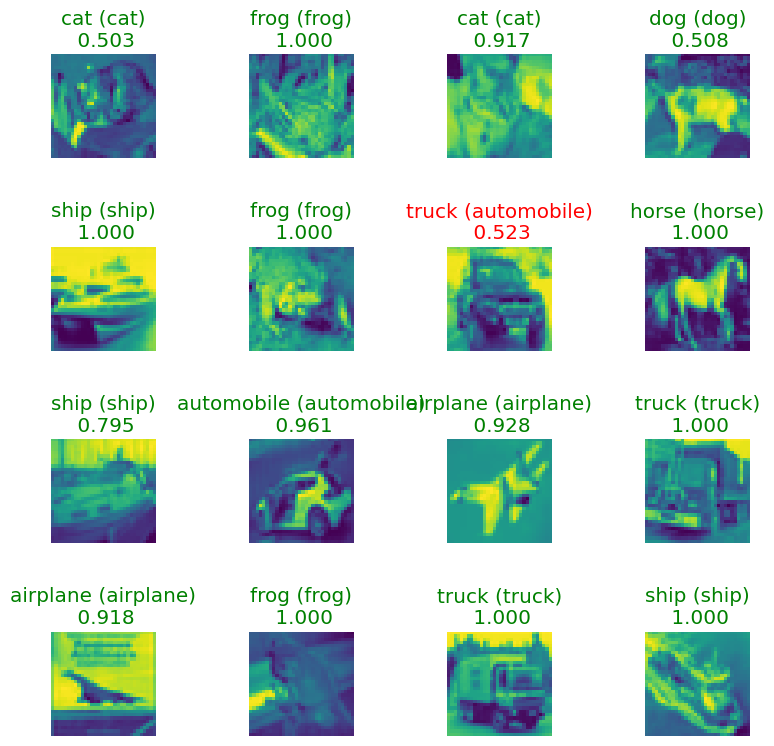

In [33]:
LABEL_NAMES=["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

from matplotlib import pyplot
def plot_predictions(images, predictions, true_labels):
  n = images.shape[0]
  nc = int(np.ceil(n / 4))
  fig = pyplot.figure(figsize=(4,3))
  # axes = fig.add_subplot(nc, 4)
  f, axes = pyplot.subplots(nc, 4)
  f.tight_layout()
  for i in range(nc * 4):
    y = i // 4
    x = i % 4
    axes[x, y].axis('off')

    label = LABEL_NAMES[np.argmax(predictions[i])]
    confidence = np.max(predictions[i])
    if i > n:
      continue
    axes[x, y].imshow(images[i])
    pred_label = np.argmax(predictions[i])
    axes[x, y].set_title("{} ({})\n {:.3f}".format(
      LABEL_NAMES[pred_label],
      LABEL_NAMES[true_labels[i][0]],
      confidence
    ), color=("green" if true_labels[i] == pred_label else "red"))
  pyplot.gcf().set_size_inches(8, 8)

plot_predictions(
    np.squeeze(x_test[:16]),
    model.predict(x_test[:16]),
    y_test[:16]
)